In [5]:
d={}
d["Fine-tuning albertina-900m"]={"micro-f1":0.93018682399213370,"micro-precision":0.9304918032786885,"micro-recall":0.9298820445609436}
d["Fine-tuning bert-base-portuguese"]={"micro-f1":0.9335088874259381}
d["Fine-tuning bert-large"]={"micro-f1":0.9478487614080834}
d["Fine-tuning albertina-100m"] = { 'micro-f1': 0.9301868239921337,'micro-precision': 0.9304918032786885,'micro-recall': 0.9298820445609436}
d["lora bert-large"] = { 'micro-f1': 0.8645690834473324 }
d["Fine-tuning xlm-roberta-base"] = {'micro-f1': 0.935546875}
d["zero-shot albertina-1b5"] = {'micro-f1': 0.39000000000000007}
d["Prompting-Few Shot Qwen2.5-1.5B"] ={'micro-f1': 0.4788048552754435, 'micro-precision': 0.33481326717158527, 'micro-recall': 0.8401048492791612}
d["Prompting NO Shot Qwen2.5-7B"] ={'micro-f1': 0.4792578330124279, 'micro-precision': 0.3269644136613327, 'micro-recall': 0.8971166448230669}


C:\Users\diogo\AppData\Local\Temp\ipykernel_12572\4133550937.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='micro-f1', data=df, palette='viridis')


Text(0.5, 1.0, 'Micro F1 Score for Different Models')

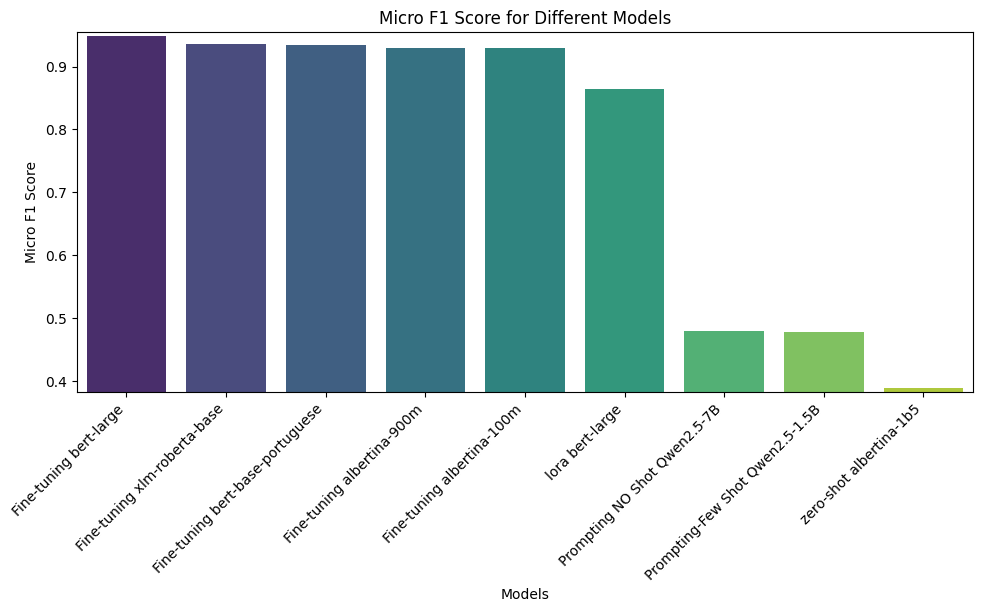

In [6]:
#create a graph bar plot with the micro-f1 score for each model
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


# convert to pandas DataFrame for easier plotting
df = pd.DataFrame([
    {"Model": model, "micro-f1": d[model]["micro-f1"]}
    for model in d
])
# sort the bars by micro-f1 score
df = df.sort_values(by='micro-f1', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='micro-f1', data=df, palette='viridis')


# set the y-axis limits to the lowest -0.02 and highest +0.02 of the micro-f1 scores 
plt.ylim( df['micro-f1'].min() - 0.007, df['micro-f1'].max() + 0.007)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Ensure everything fits within the figure
plt.xlabel('Models')
plt.ylabel('Micro F1 Score')
plt.title('Micro F1 Score for Different Models')

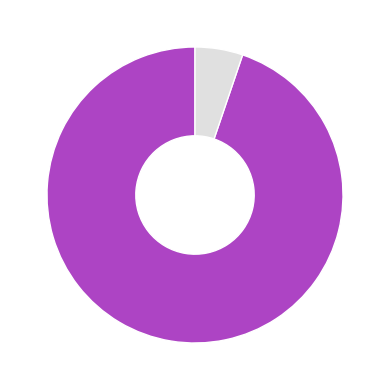

Fine-tuning bert-large - micro-f1: 0.947849


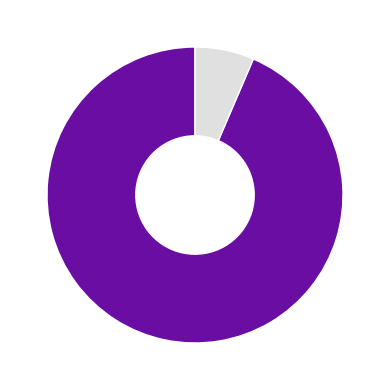

Fine-tuning xlm-roberta-base - micro-f1: 0.935547


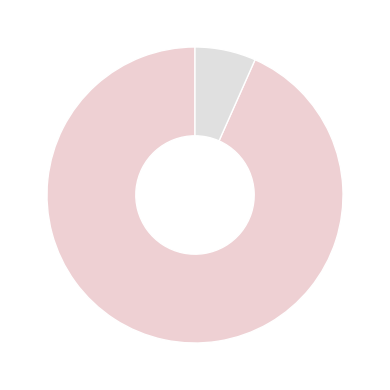

Fine-tuning bert-base-portuguese - micro-f1: 0.933509


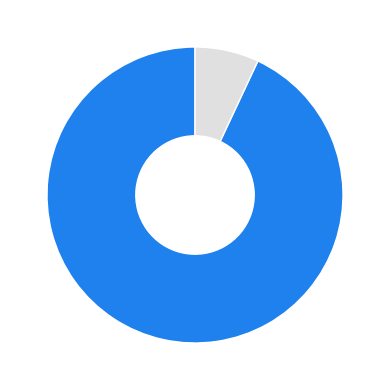

Fine-tuning albertina-900m - micro-f1: 0.930187


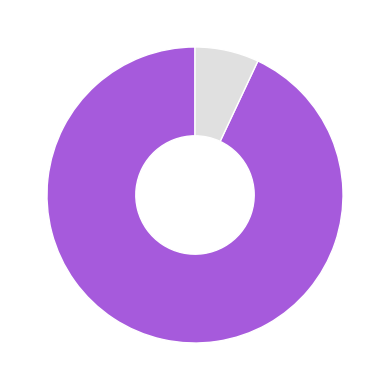

Fine-tuning albertina-100m - micro-f1: 0.930187


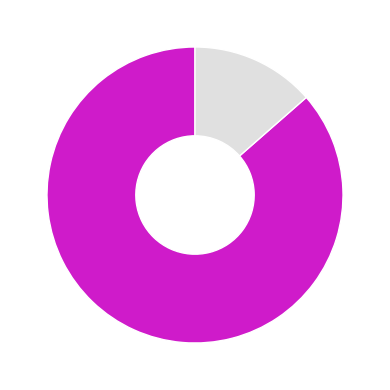

lora bert-large - micro-f1: 0.864569


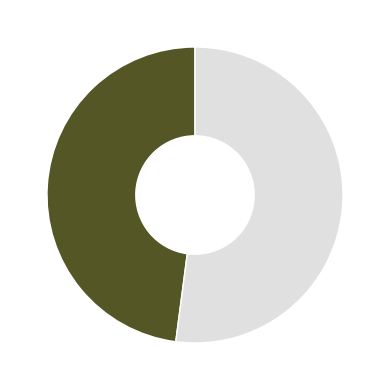

Prompting NO Shot Qwen2.5-7B - micro-f1: 0.479258


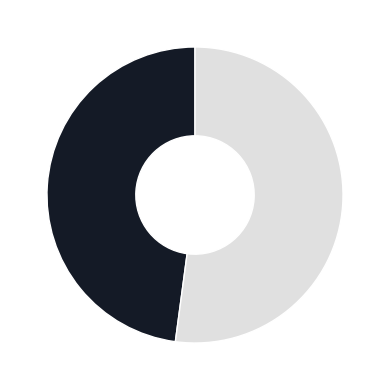

Prompting-Few Shot Qwen2.5-1.5B - micro-f1: 0.478805


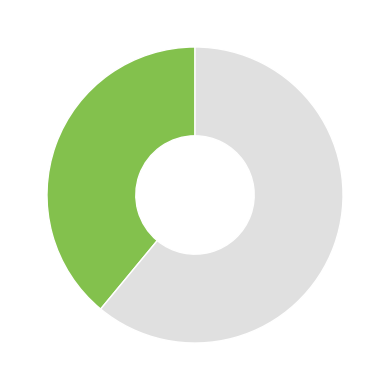

zero-shot albertina-1b5 - micro-f1: 0.390000


In [39]:
# create a csv file with the data
def plot_f1_gauges(model, score):
    fig, ax = plt.subplots( figsize=(4, 4))

    # use random color for the gauge
    color = np.random.rand(3,)
    
    ax.pie([score, 1-score], startangle=90, colors=[color, '#e0e0e0'],
            wedgeprops=dict(width=0.6, edgecolor='w'))
    ax.set(aspect="equal")
    #ax.set_title(f"{model}\nmicro-f1: {score:.6f}")
    # Add center text
    
    plt.tight_layout()
    plt.show()
    print(f"{model} - micro-f1: {score:.6f}")
    

for idx, row in df.iterrows():
    plot_f1_gauges(row['Model'], row['micro-f1'])

